In [2]:
# Import the library
import pyrosm

# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)

Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Initialize self.  See help(type(self)) for accurate signature.



C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
import pyrosm


# Initialize the OSM object 
osm = pyrosm.OSM(r'D:\Nara\Samarkand\Sam.osm.pbf')

# See the type
print("Type of 'osm' instance: ", type(osm))

Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


## Roads

<AxesSubplot:>

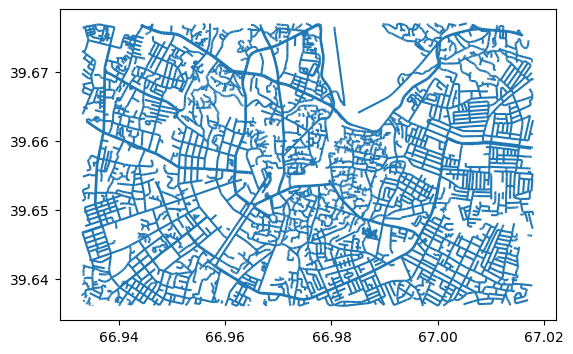

In [4]:
# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot:>

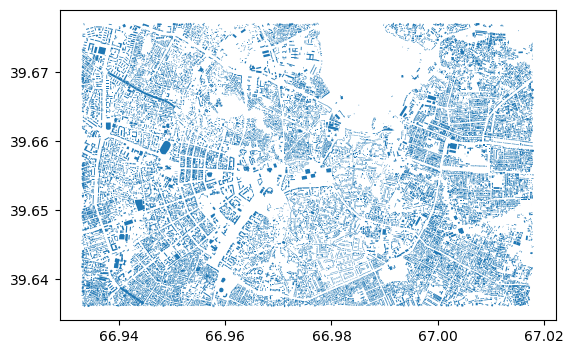

In [6]:
buildings = osm.get_buildings()
buildings.plot()

C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\pyrosm\pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(
C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


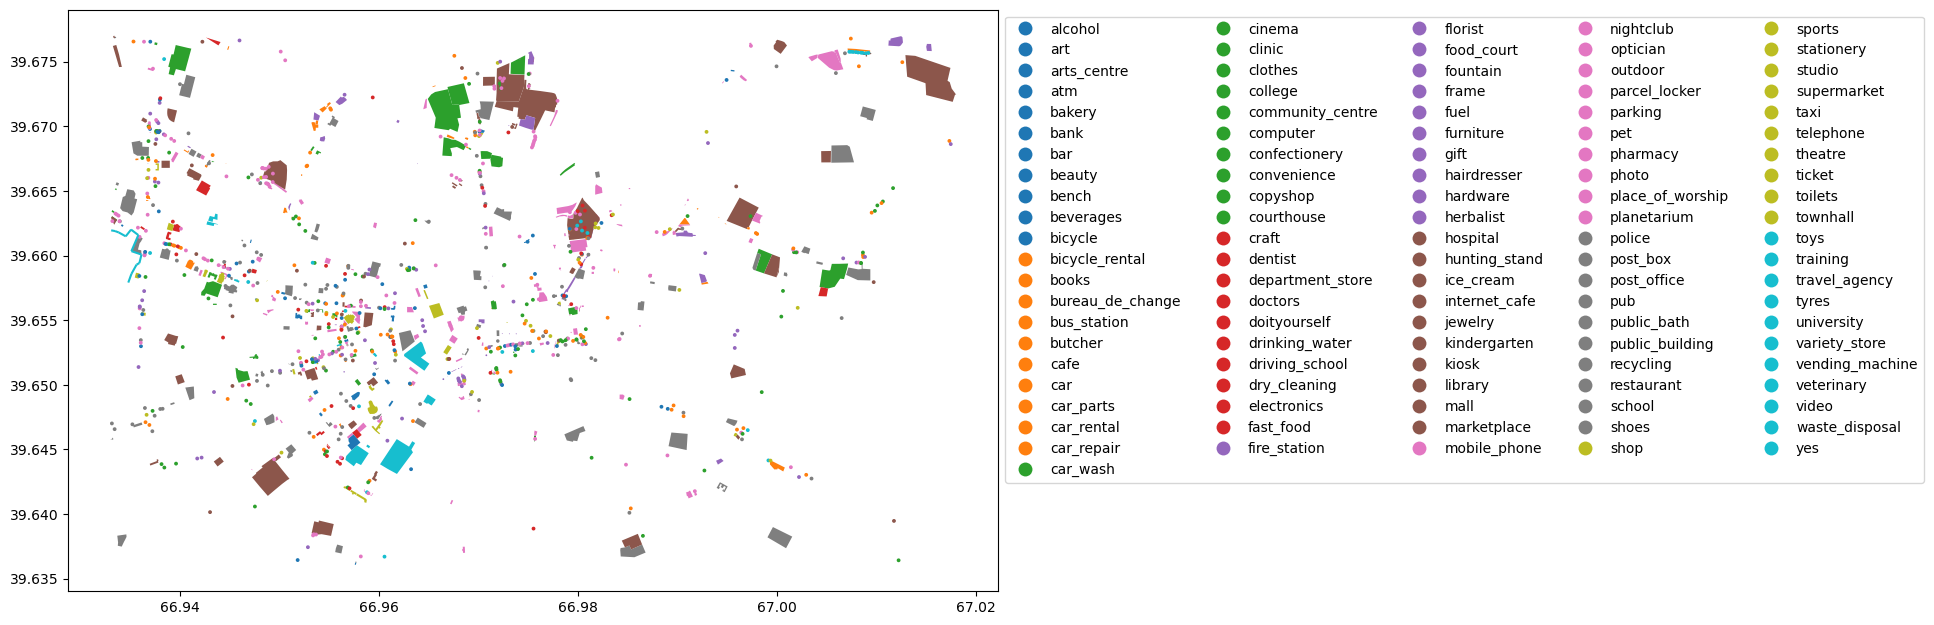

In [7]:
# By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
# Here, let's read only "amenity" and "shop" by applying a custom filter that
# overrides the default filtering mechanism
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

In [16]:
pois

,lat,tags,lon,timestamp,version,id,changeset,addr:city,addr:country,addr:full,...,geometry,osm_type,addr:housename,atm,building:levels,landuse,parking,wikipedia,water,poi_type
0,39.658428,None,66.987213,0,0,815635514,0.0,None,None,None,...,POINT (66.98721 39.65843),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,place_of_worship
1,39.654064,None,66.957916,0,0,889293932,0.0,None,None,None,...,POINT (66.95792 39.65406),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,telephone
2,39.656727,None,66.978577,0,0,889294000,0.0,None,None,None,...,POINT (66.97858 39.65673),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,restaurant
3,39.652626,None,66.957611,0,0,889294006,0.0,None,None,None,...,POINT (66.95761 39.65263),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cafe
4,39.660065,"{""cuisine"":""regional""}",66.980370,0,0,889294173,0.0,None,None,None,...,POINT (66.98037 39.66006),node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cafe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,NaN,"{""fixme"":""New mosque, under construction but a...",NaN,0,-1,1110547194,NaN,None,None,None,...,"POLYGON ((66.99082 39.64166, 66.99114 39.64175...",way,None,None,None,None,None,None,None,place_of_worship
1160,NaN,"{""cuisine"":""burger"",""diet:dairy"":""yes""}",NaN,0,-1,1122556137,NaN,None,None,None,...,"POLYGON ((66.97407 39.67519, 66.97422 39.67525...",way,None,None,None,None,None,None,None,restaurant
1161,NaN,"{""type"":""multipolygon""}",NaN,0,-1,24782795,0.0,None,None,None,...,"POLYGON ((67.00602 39.66785, 67.00559 39.66784...",relation,NaN,NaN,2,NaN,NaN,NaN,NaN,school
1162,NaN,"{""type"":""multipolygon""}",NaN,0,-1,65032891,0.0,None,None,None,...,"POLYGON ((66.95560 39.66994, 66.95591 39.67041...",relation,NaN,NaN,None,NaN,NaN,NaN,NaN,police


C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot:>

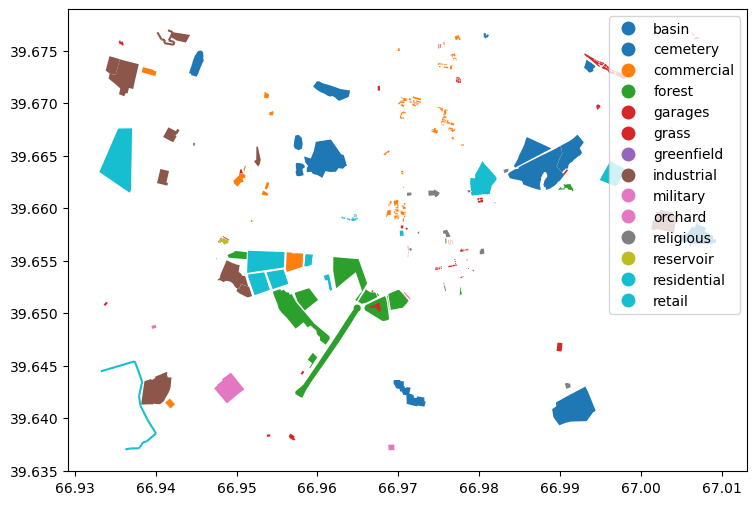

In [8]:
landuse = osm.get_landuse()
landuse.plot(column='landuse', legend=True, figsize=(10,6))

In [17]:
landuse

,landuse,id,timestamp,version,tags,osm_type,geometry,changeset
0,cemetery,110310489,0,-1,"{""name"":""\u0410\u0448\u043A\u0435\u043D\u0430\...",way,"POLYGON ((66.95727 39.66692, 66.95713 39.66641...",NaN
1,cemetery,110310496,0,-1,"{""denomination"":""orthodox"",""name"":""Qahramonlar...",way,"POLYGON ((66.96060 39.66288, 66.96099 39.66353...",NaN
2,cemetery,110310502,0,-1,"{""addr:postcode"":""140000"",""addr:street"":""Sadri...",way,"POLYGON ((66.98903 39.64085, 66.98921 39.64006...",NaN
3,retail,167293774,0,-1,"{""amenity"":""marketplace"",""name"":""\u043A\u0440\...",way,"POLYGON ((66.95854 39.65559, 66.95840 39.65448...",NaN
4,industrial,168848643,0,-1,"{""name"":""\u0421\u0430\u043C\u0430\u0440\u043A\...",way,"POLYGON ((66.94877 39.65504, 66.94963 39.65472...",NaN
...,...,...,...,...,...,...,...,...
242,grass,978623762,0,-1,None,way,"POLYGON ((66.95664 39.63851, 66.95656 39.63843...",NaN
243,grass,984590865,0,-1,None,way,"POLYGON ((66.93541 39.67593, 66.93563 39.67597...",NaN
244,grass,1004221866,0,-1,None,way,"POLYGON ((67.00687 39.67635, 67.00677 39.67628...",NaN
245,orchard,1089540153,0,-1,"{""area"":""yes"",""name"":""\u0421\u0430\u0434 \u043...",way,"POLYGON ((66.96877 39.63747, 66.96880 39.63694...",NaN


C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\pyrosm\pyrosm.py:382: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_natural_data(
C:\Users\ComVi\AppData\Roaming\Python\Python39\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


,lat,tags,lon,timestamp,version,id,changeset,natural,geometry,osm_type,water
0,39.647408,None,66.960938,0,0,2135624583,0.0,tree,POINT (66.96094 39.64741),node,NaN
1,39.673676,None,66.994835,0,0,5122011921,0.0,spring,POINT (66.99483 39.67368),node,NaN
2,39.665138,"{""name"":""Holy Spring""}",66.985016,0,0,5808876903,0.0,spring,POINT (66.98502 39.66514),node,NaN
3,39.656300,"{""intermittent"":""no""}",66.970673,0,0,5916420064,0.0,spring,POINT (66.97067 39.65630),node,NaN
4,39.656925,"{""name"":""Osminog Island""}",66.948250,0,0,5934673748,0.0,cliff,POINT (66.94825 39.65693),node,NaN


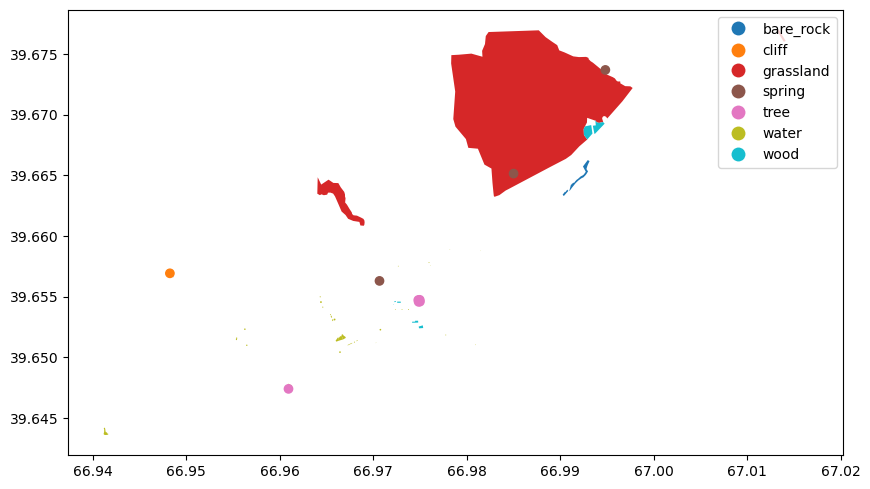

In [15]:
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(10,6))


AttributeError: 'NoneType' object has no attribute 'plot'